### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### Conociendo la estrucutura de datos

In [ ]:
tienda.shape

(2359, 12)

In [ ]:
tienda2.shape

(2359, 12)

In [ ]:
tienda3.shape

(2359, 12)

In [ ]:
tienda4.shape

(2358, 12)

In [ ]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [ ]:
tienda2.dtypes

,0
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,object
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


#1. Análisis de facturación



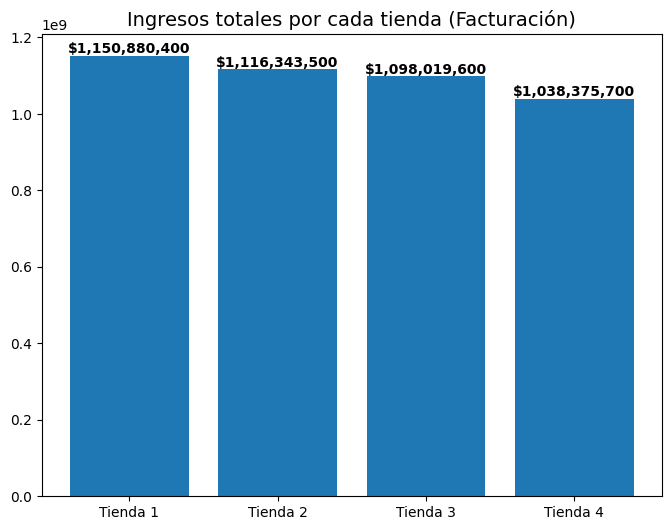

,Tienda,Ingreso Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


In [ ]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [t['Precio'].sum() for t in tiendas]
df_ingresos = pd.DataFrame({'Tienda': nombres_tiendas, 'Ingreso Total': ingresos})

plt.figure(figsize=(8, 6))
barras = plt.bar(df_ingresos['Tienda'], df_ingresos['Ingreso Total'])

for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.title('Ingresos totales por cada tienda (Facturación)', fontsize=14)

plt.show()

df_ingresos

# 2. Ventas por categoría

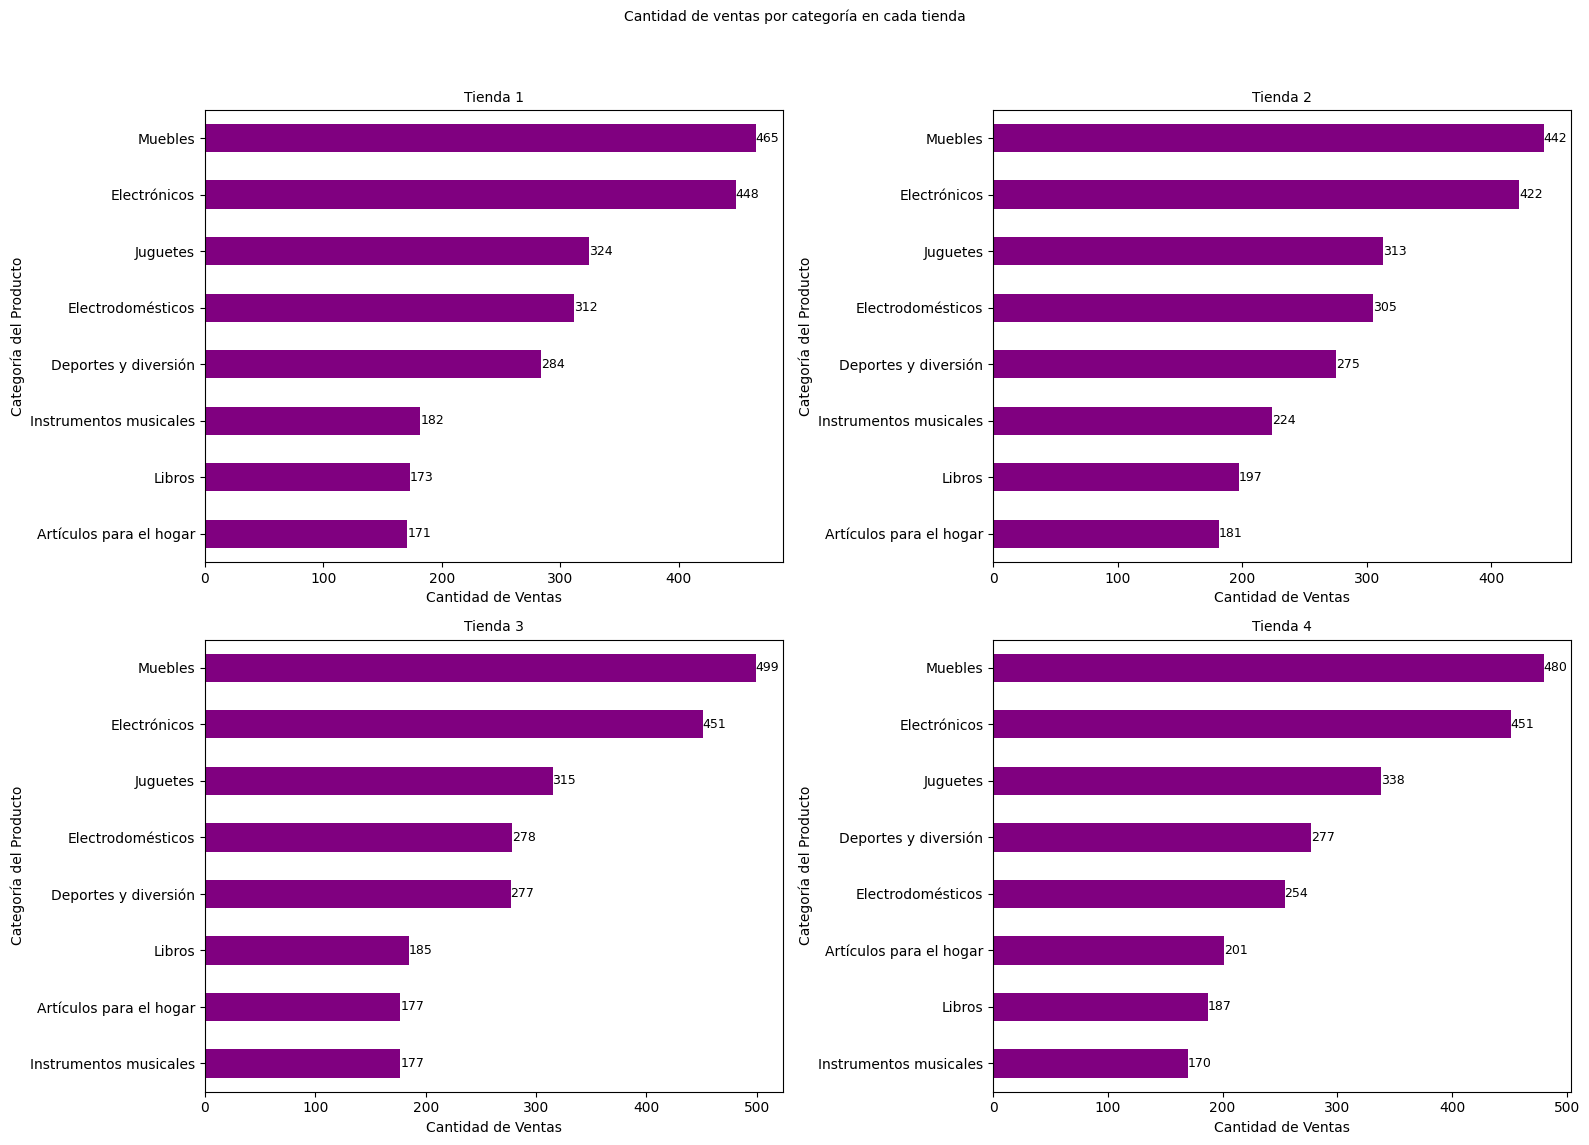

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Cantidad de ventas por categoría en cada tienda', fontsize=10)

axes = axes.flatten()

for i, tienda in enumerate(tiendas):
    cantidad = tienda['Categoría del Producto'].value_counts().sort_values(ascending=True)
    cantidad.plot(kind='barh', ax=axes[i], color='purple')
    axes[i].set_title(f'{nombres_tiendas[i]}', fontsize=10)
    axes[i].set_xlabel('Cantidad de Ventas')
    for index, value in enumerate(cantidad):
        axes[i].text(value, index, str(int(value)), va='center', ha='left', fontsize=9)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 3. Calificación promedio de la tienda


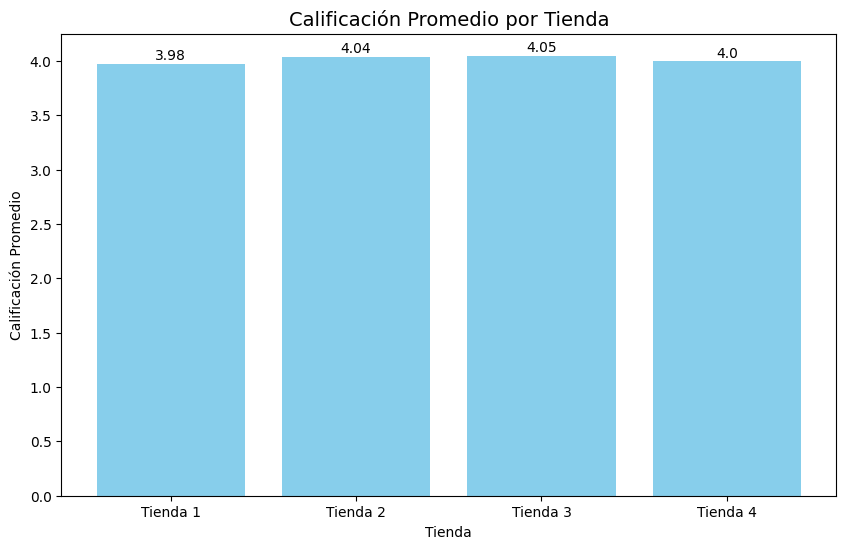

,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


In [ ]:
calificaciones_promedio = [t['Calificación'].mean() for t in tiendas]
df_calificaciones = pd.DataFrame({'Tienda': nombres_tiendas, 'Calificación Promedio': calificaciones_promedio})

plt.figure(figsize=(10, 6))
bars = plt.bar(df_calificaciones['Tienda'], df_calificaciones['Calificación Promedio'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda', fontsize=14)
plt.show()

df_calificaciones

# 4. Productos más y menos vendidos

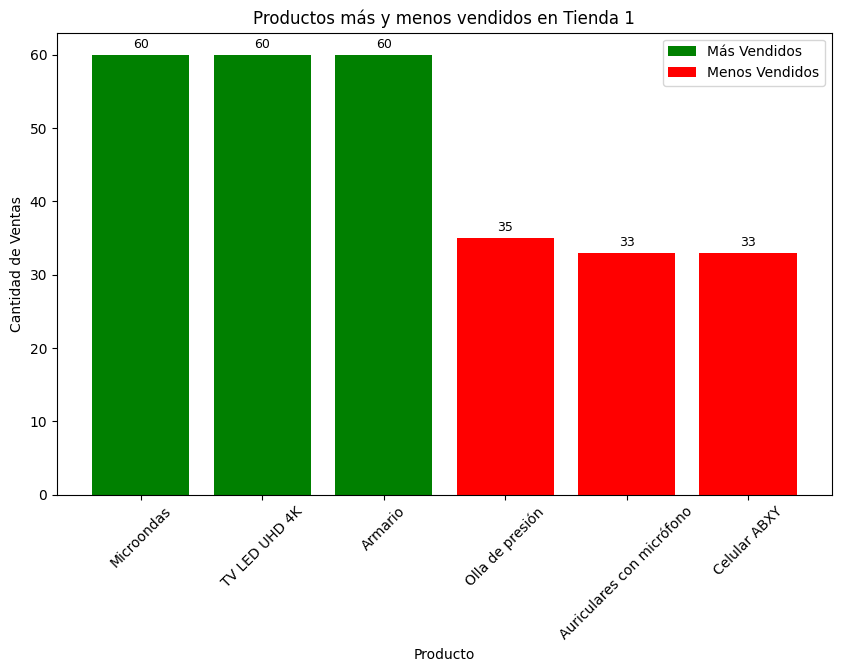

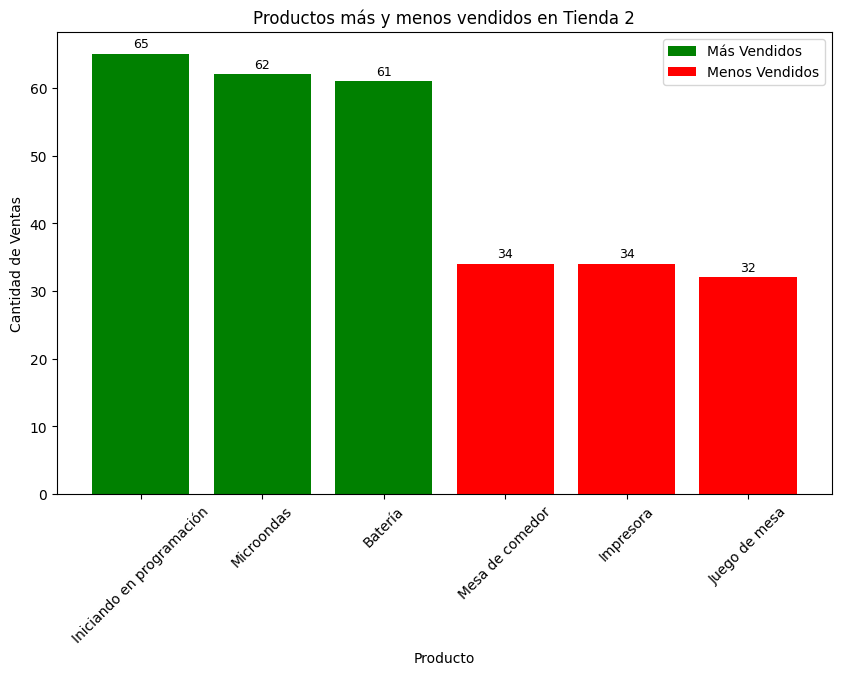

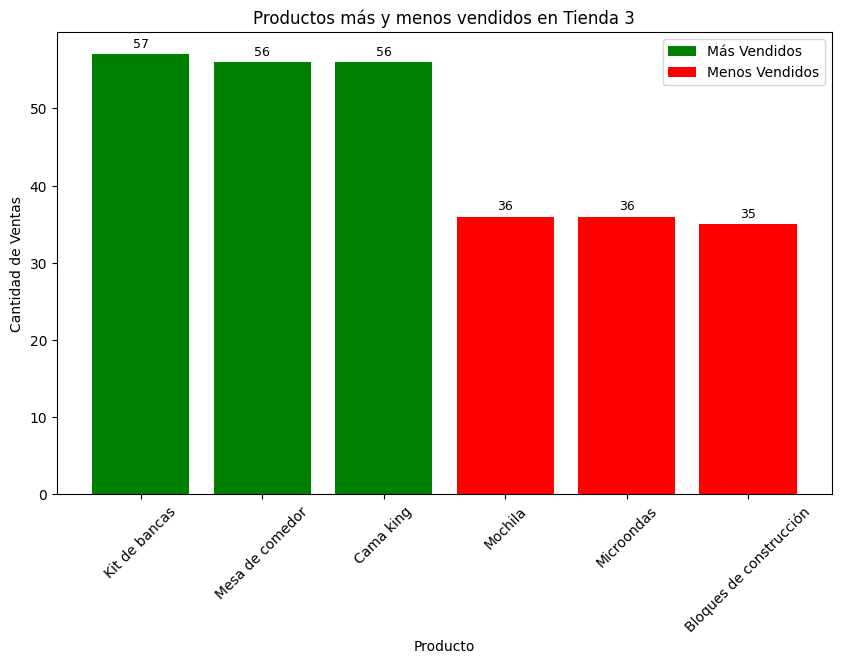

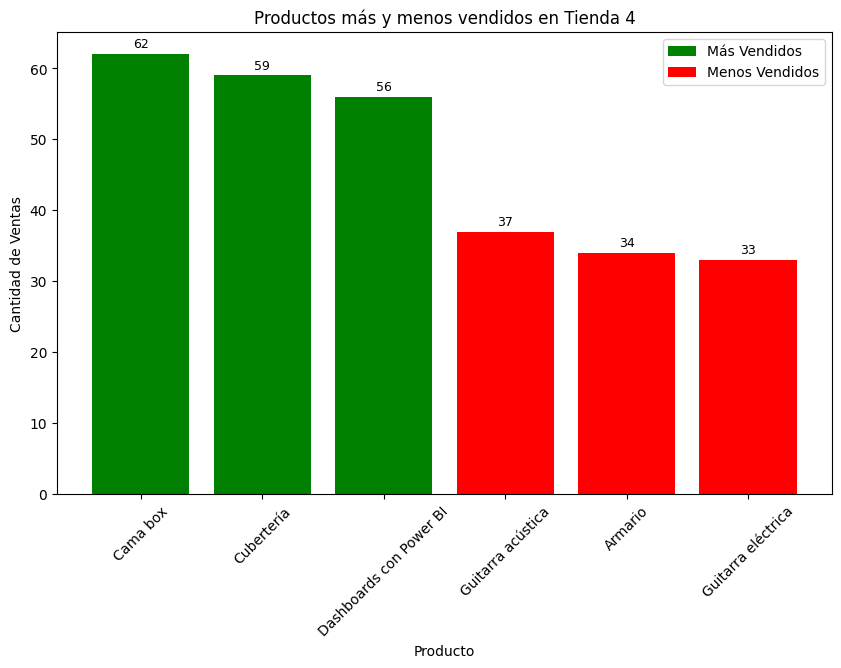

In [ ]:

for i, tienda in enumerate(tiendas):
    productos_mas_vendidos = tienda['Producto'].value_counts().head(3)
    productos_menos_vendidos = tienda['Producto'].value_counts().tail(3)
    plt.figure(figsize=(10, 6))
    bars_mas = plt.bar(productos_mas_vendidos.index, productos_mas_vendidos.values, label='Más Vendidos', color='green')
    for bar in bars_mas:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=9)
    bars_menos = plt.bar(productos_menos_vendidos.index, productos_menos_vendidos.values, label='Menos Vendidos', color='red')
    for bar in bars_menos:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=9)

    plt.xlabel('Producto')
    plt.ylabel('Cantidad de Ventas')
    plt.title(f'Productos más y menos vendidos en {nombres_tiendas[i]}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# 5. Envío promedio por tienda

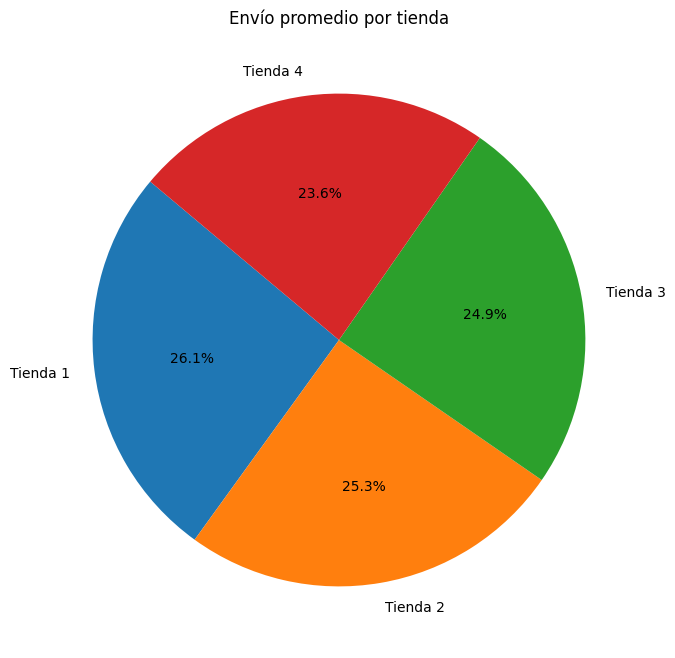

In [ ]:
envio_promedio = [t['Costo de envío'].mean() for t in tiendas]

plt.figure(figsize=(8, 8))
plt.pie(envio_promedio, labels=nombres_tiendas, autopct='%1.1f%%', startangle=140)
plt.title('Envío promedio por tienda')
plt.show()

## Conclusión y Recomendación

Tras un análisis exhaustivo de los ingresos totales, las ventas por categoría de producto, las calificaciones promedio de los clientes, los productos más y menos vendidos, y el costo de envío promedio de cada una de las cuatro tiendas, se presenta la siguiente síntesis y recomendación para el Sr. Juan:

### Resumen de Hallazgos Clave:

1.   **Ingresos Totales:** La Tienda 1 se destaca por generar los ingresos totales más altos ($1,150,880,400), lo que sugiere una mayor actividad comercial y una base de clientes más robusta en comparación con las otras tiendas.

2.   **Ventas por Categoría:** 'Muebles' es consistentemente la categoría más vendida en todas las tiendas, indicando una fuerte demanda en este segmento. Las categorías menos vendidas varían, pero 'Artículos para el hogar', 'Instrumentos musicales' y algunos productos específicos de libros o electrónica, aparecen con menor frecuencia.

3.   **Calificaciones Promedio:** Las calificaciones promedio de los clientes son notablemente similares en todas las tiendas, oscilando entre 3.98 y 4.05. Esto indica un nivel de satisfacción general comparable en todas las plataformas, sin una diferencia significativa que sirva como factor decisivo por sí solo.
4.  **Productos Más y Menos Vendidos:** Algunos productos como 'Microondas' son consistentemente populares en varias tiendas. Sin embargo, hay una variabilidad en los productos menos vendidos, lo que puede depender de la demanda local o la oferta específica de cada tienda.
5.   **Costo de Envío Promedio:** La Tienda 4 tiene el costo de envío promedio más bajo 23,459.46, mientras que la tienda 1 registra el más alto 26,018.61. Este es un factor importante a considerar para la rentabilidad.

### Recomendación para el Sr. Juan:

Considerando todos los factores analizados, se recomienda al Sr. Juan vender sus productos en la **Tienda 1**.

**Justificación:**

Aunque la Tienda 1 presenta el costo de envío promedio más alto, su liderazgo en **ingresos totales** es el factor más determinante. Un mayor volumen de ventas y una mayor capacidad de generación de ingresos implican un mercado más grande y una oportunidad superior para la comercialización de productos. Las pequeñas diferencias en las calificaciones promedio de los clientes no son suficientes para desviar la atención de la fortaleza financiera de la Tienda 1.

El Sr. Juan podría implementar estrategias para mitigar el impacto de los costos de envío más altos en la Tienda 1, como por ejemplo:

*   **Optimización de Envíos:** Negociar mejores tarifas con los proveedores de logística o buscar alternativas más eficientes en costos para reducir el impacto en los precios finales o los márgenes de ganancia.
*   **Precios Estratégicos:** Ajustar los precios de los productos para absorber parcialmente los costos de envío más altos, manteniendo la competitividad y la percepción de valor para el cliente.

En resumen, la Tienda 1 ofrece el mayor potencial de mercado y oportunidades de venta, lo cual es primordial para el éxito comercial del Sr. Juan. La gestión de los costos de envío, aunque relevante, puede abordarse con estrategias adecuadas para maximizar la rentabilidad en esta plataforma líder.

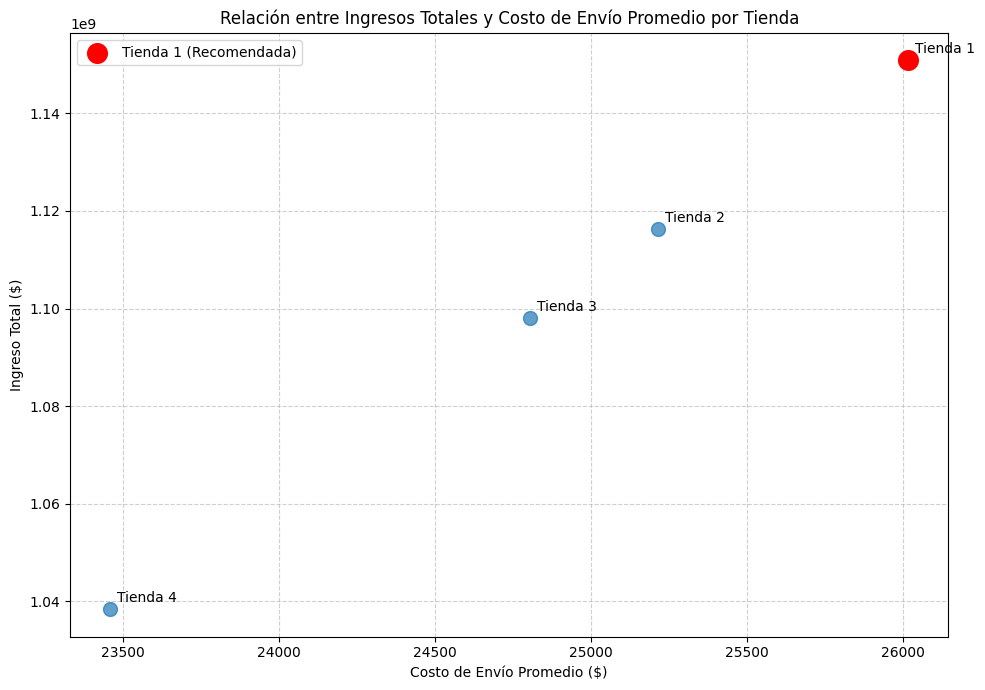

In [ ]:
df_analisis = df_ingresos.copy()
df_analisis['Envio Promedio'] = envio_promedio

plt.figure(figsize=(10, 7))

# Plotting all stores
scatter = plt.scatter(df_analisis['Envio Promedio'], df_analisis['Ingreso Total'], s=100, alpha=0.7)

# Highlighting Tienda 1
tienda1_data = df_analisis[df_analisis['Tienda'] == 'Tienda 1']
plt.scatter(tienda1_data['Envio Promedio'], tienda1_data['Ingreso Total'], color='red', s=200, label='Tienda 1 (Recomendada)', zorder=5)

# Annotate each point with the store name
for i, row in df_analisis.iterrows():
    plt.annotate(row['Tienda'], (row['Envio Promedio'], row['Ingreso Total']),
                 textcoords="offset points", xytext=(5,5), ha='left')

plt.title('Relación entre Ingresos Totales y Costo de Envío Promedio por Tienda')
plt.xlabel('Costo de Envío Promedio ($)')
plt.ylabel('Ingreso Total ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()